In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

ccs = 15
css = 250

def cartesian_to_polar(row):
    x, y = tuple(row['loc'])
    radius = np.sqrt(x**2 + y**2)
    angle = np.degrees(np.arctan2(y, x))  # Convert radians to degrees
    return pd.Series([radius, angle], index=['radius', 'angle'])

def synth_seq(radius, angle, ccs, css):

    spiral = []
    for c_rad in range(ccs):
        spiral.append((angle + ((c_rad*css) - radius) / 10) % 360)

    return spiral

loc_data = [
    {'nm': 'great-wall-of-china', 'loc': [40.431907,116.570374]},
    {'nm': 'chichen-itza', 'loc': [20.683056, -88.568651]},
    {'nm': 'khaznah-petra-jordan', 'loc': [30.328611, 35.444167]},
    {'nm': 'machu-pichhu-peru', 'loc': [-13.163136, -72.544962]},
    {'nm': 'christ-the-redeemer-rio-de-janeeiro-brazil', 'loc': [-22.951916, -43.210487]},
    {'nm': 'Colosseum', 'loc': [41.890251, 12.492373]},
    {'nm': 'taj-mahal', 'loc': [27.175015, 78.042155]}
]

df = pd.DataFrame(loc_data)
df[['radius', 'angle']] = df.apply(cartesian_to_polar, axis=1)
df = df.sort_values(by='radius').reset_index()

df 

,index,nm,loc,radius,angle
0,5,Colosseum,"[41.890251, 12.492373]",43.713299,16.605460
1,2,khaznah-petra-jordan,"[30.328611, 35.444167]",46.648833,49.447294
2,4,christ-the-redeemer-rio-de-janeeiro-brazil,"[-22.951916, -43.210487]",48.927872,-117.975694
3,3,machu-pichhu-peru,"[-13.163136, -72.544962]",73.729503,-100.284312
4,6,taj-mahal,"[27.175015, 78.042155]",82.638123,70.801400
5,1,chichen-itza,"[20.683056, -88.568651]",90.951607,-76.855526
6,0,great-wall-of-china,"[40.431907, 116.570374]",123.383107,70.871128


In [53]:
factor = ccs / len(df)
factor

2.142857142857143

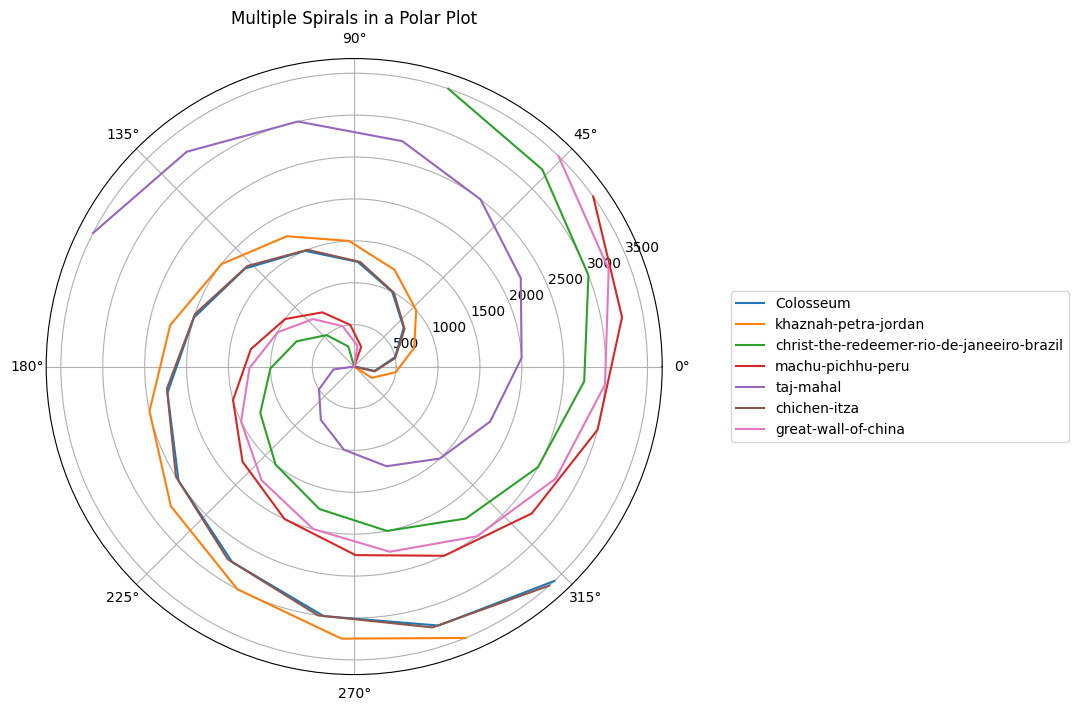

In [55]:
# Create polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

fig.set_size_inches(12, 8)

for idx, row in df.iterrows():
    radius_equivalent = ((idx+1)*factor*250)
    angles = synth_seq(radius_equivalent, row['angle'], ccs, css)

    indices = np.arange(0, (15*250), 250)
    angles_rad = np.radians(angles)

    ax.plot(angles_rad, indices, label=row['nm'])

ax.legend(loc="center left", bbox_to_anchor=(1.1, 0.5))

# Formatting
ax.set_title("Multiple Spirals in a Polar Plot")
ax.grid(True)

# Show plot
plt.show()